In [1]:
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline
# %matplotlib qt5하면 창으로 뜸
import seaborn as sns
from pandas_ml import ConfusionMatrix
import datetime
from mpl_toolkits.mplot3d import Axes3D, axes3d
import operator
import mglearn
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC, SVC
# svm 과적합 과정 메소드
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
# sklearn 함수 2장 performance evaluation에 정리 해둠
# Ctrl-f로 roc_curve 검색
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 05. 앙상블 기법
    
        02. Bagging

    - bagging : 원 데이터 집합으로부터 크기가 같은 표본을 여러 번 random 복원 추출하는 기법
    - 반복추출 방법을 사용하기 때문에 같은 데이터가 한 표본에 여러번 추출될 수도, 안뽑힐 수도있음
    - 데이터가 충분히 큰 경우, 각 데이터가 하나의 붓스트랩 표본에서 제외될 확률 = 36.78%

$$\lim_{n \to \infty}(1-\frac{1}{n})^n = e^{-1} = 0.3678$$

Bagging의 개념

    - 학습데이터를 랜덤으로 샘플링하여 여러개의 bag으로 분할하고, 각 bag별로 모델을 학습한 후, 각 결과를 합하여 최종결과를 추출
    n  : 전체 학습 데이터 수
    n' : bag에 포함된 데이터 수, 전체 데이터 중 샘플링된 데이터
    m  : bag의 갯수, 학습할 모델별로 샘플링된 데이터 셋
    원리 : weak model 여러개를 결합하여 high variance -> low variance로 변환,예측성능 향상

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

In [10]:
# 단일 결정 트리와 500개 트리로 만든 배깅 앙상블 테스트 비교 p.666
X, y = make_moons(n_samples = 500, noise = 0.25, random_state = 3)
# random state는 난수 발생을 위한 seed 인자값
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)
# stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
# stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.


bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500,
                           max_samples = 100, bootstrap = True, n_jobs = -1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
# bag_clf 모형의 test의 예측값 출력

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)

oob 평가

    - 배깅을 사용하면 어떤 샘플은 한 예측기를 위해 여러번 샘플링되고 어떤 것은 전혀 선택되지 않을 수 있음
    - BaggingClassifier는 기본값으로 중복을 허용하여(bootstrap=True) 훈련 세트의 크기 만큼인 m개 샘플을 선택
    - 이는 평균적으로 각 예측기에 훈련 샘플의 63% 정도만 샘플링된다는 것을 의미
    - 선택되지 않은 훈련 샘플의 나머지 37%는 oob(out-of-bag) 샘플
    - 예측기마다 남겨진 37%는 모두 다름
    - 예측기가 훈련되는 동안에는 oob 샘플을 사용하지 않으므로 검증 세트나 교차 검증을 사용하지 않고 oob 샘플을 사용해 평가할 수 있음

In [17]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500,
                           bootstrap = True, n_jobs = -1, oob_score = True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9306666666666666

In [18]:
from sklearn.metrics import accuracy_score
# 정확도 점수
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [15]:
# 배깅 분류기에 있는 결정 트리의 결정 경계 시각화 p.668
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify = ym, random_state = 42)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 5, n_jobs = -1, random_state = 42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

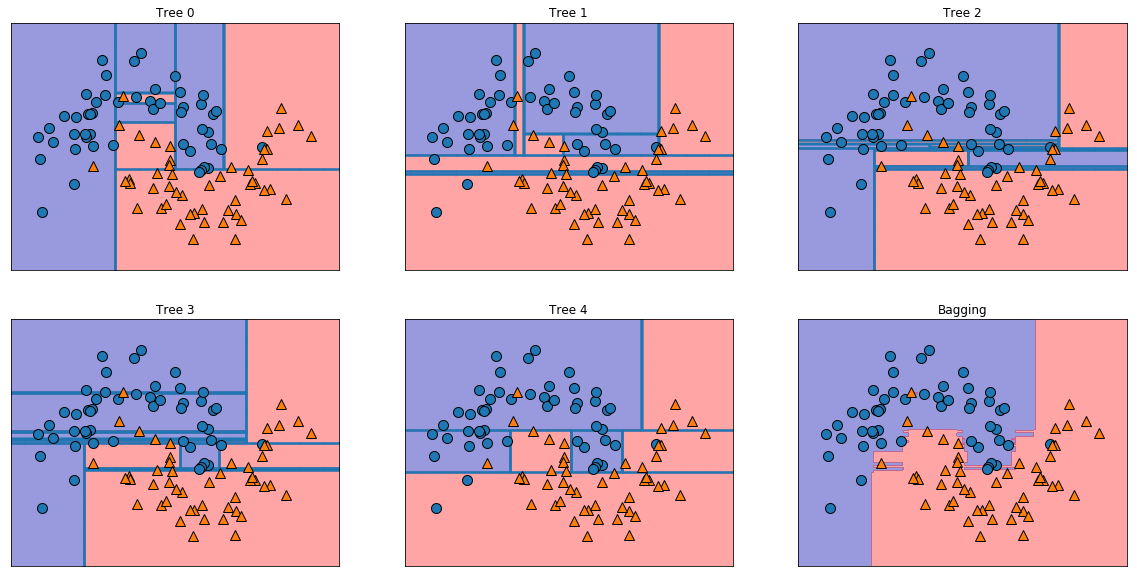

In [22]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

##### Random Forest p.669~

    - 앙상블 of DT (배깅한 DT라고 생각하면 됨)
    - DT의 다양성을 주기 위해 bagging / 무작위 속성 선택 / voting
    
    - DT의 문제점 : train data에 overfitting 됨.
    - RF는 이를 회피하기 위해 만들어진 기법
    - RF는 조금식 다른 여러 DT를 묶는 기법
    - 각 tree는 예측을 잘하지만 overfit 하는 경향이 있는데, 서로 다른 방향으로 overfit된 tree를 평균냄
    
    - 각 tred는 target값 예측을 잘 하고, 다른 트리랑은 구별되어야 한다. (서로 달라지도록 randomness 부여)
    - randomness 부여 방법 : 1.데이터 포인트를 무작위로 선택 / 2. 분할 test에서 특성을 무작위로 선택

-방법론 p.671

    1. 부트스트랩 샘플
       (100개의 데이터 포인트 중에서 무작위로 100번 반복추출)
       (원래 데이터셋 원소가 100개면, 하나씩 뽑아서 100개까지 추출)
       (일부는 누락되고 일부는 중복되어 포함)
    2. 1을 만들고자 하는 트리 개수만큼 뽑아 냄
    3. 각각 DT를 만드는데 모든 변수 속성을 사용해서 분류하는게 아니고
       일부 변수 속성을 랜덤하게 선택해서 최선의 분류를 해봄
       (트리 각 노드들은 매번 다른 변수 속성을 사용해서 분류)
    4. 즉, 위의 과정 때문에 tree들이 다 달라짐
    5. 트리들이 예측한 확률을 평균내어(회귀) or 가장 높은 확률을 가진 넘(분류)이 예측값

-중요!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

    - 변수 선택방법중 tree(앙상블) 분석시 출력되는 feature importance 값을 보고 제거 또는 선택한다.

In [10]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1, random_state = 42)
rnd_clf.fit(iris["data"], iris["target"])
for name, importance in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, "=", importance)
# feature imoportance는 불확실도를 많이 낮출수록 증가

sepal length (cm) = 0.11249225099876374
sepal width (cm) = 0.023119288282510326
petal length (cm) = 0.44103046436395765
petal width (cm) = 0.4233579963547681


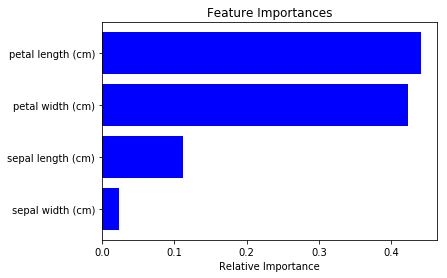

In [12]:
features = iris['feature_names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)
# argsort = 정렬한 후에 인덱스를 반환
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
# 간단한 iterate 돌리는 함수 삽입
plt.xlabel('Relative Importance')
plt.show()

-랜덤포레스트 장점
    1. 파라미터 튜닝에 민감하지 않음
    2. 데이터 스케일 맞출 필요 없음
    3. 데이터 커도 잘 작동
    4. 트리 많을수록 robust
    5. 분산처리 손쉬움
-단점
    1. 차원 높고 sparse한 데이터에선 힘들어짐 (sparse : 차원, 전체에 비해 데이터의 밀도가 희소함)
    2. 메모리 많이 쓰고 상대적으로 느릴 수 밖에
    but, tree계열은 상황에 따라선 단점

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 05. 앙상블 기법
    
        03. Boosting

In [2]:
def loadSimpData():
    datMat = np.matrix([[1., 2.1],
                        [2., 1.1],
                        [1.3, 1.],
                        [1., 1.],
                        [2., 1.]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]
    return datMat, classLabels

datMat, classLabels = loadSimpData()

classLabels

[1.0, 1.0, -1.0, -1.0, 1.0]

##### 의사결정 스텀프 생성 함수 p.679~

In [3]:
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq): # just classify the data
    retArray = np.ones((np.shape(dataMatrix)[0], 1))
    # dataMatrix와 행 수가 같은 n행1열의 1로된 array 생성
    if threshIneq == 'lt' :
        retArray[dataMatrix[:, dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:, dimen] > threshVal] = -1.0
    return retArray
# 데이터 분류하기 위해 임계 값 비교
# 임계 값을 기준으로 한쪽 편에 있는 모든 데이터는 분류 항목을 -1로 처리하고
# 다른 한쪽 편에 있는 모든 데이터는 분류 항목을 +1로 처리
# 즉, 반환할 배열을 모두 1로 설정한 다음, 부등호를 준수하지 못하는 값을 -1로 설정

In [4]:
def buildStump(dataArr, classLabels, D):
    dataMatrix = np.mat(dataArr); labelMat = np.mat(classLabels).T
    m, n = np.shape(dataMatrix)
    numSteps = 10.0; bestStump = {}; bestClasEst = np.mat(np.zeros((m, 1)))
    minError = np.inf # init error sum, to + infinity
    for i in range(n): # loop over all dimensions
        rangeMin = dataMatrix[:, i].min(); rangeMax = dataMatrix[:, i].max()
        stepSize = (rangeMax - rangeMin) / numSteps
        for j in range(-1, np.int(numSteps)+1): # loop over all range in current dimension
            for inequal in ['lt', 'gt']: # go over less than and greater than
                threshVal = (rangeMin + np.float(j) * stepSize)
                # call stump classify with i, j, lessTHan
                predictedVals = stumpClassify(dataMatrix, i, threshVal, inequal)
                errArr = np.mat(np.ones((m,1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T*errArr #calc total error multiplied by D
                print("split : dim {}, thresh {}, \
                       thresh inequal: {}, the weighted error is {}"\
                      .format(i, threshVal, inequal, weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [5]:
D = np.mat(np.ones((5,1)) / 5)
buildStump(datMat, classLabels, D)

split : dim 0, thresh 0.9,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 0.9,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.0,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 1.0,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.1,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 1.1,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.2,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 1.2,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.3,                        thresh inequal: lt, the weighted error is [[0.2]]
split : dim 0, thresh 1.3,                        thresh inequal: gt, the weighted error is [[0.8]]


({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

##### 의사결정 스텀프로 AdaBoost 학습 구현 p.681

In [6]:
def adaBoostTrainDS(dataArr, classLabels, numlt = 40):
    weakClassArr = []
    m = np.shape(dataArr)[0]
    D = np.mat(np.ones((m,1)) / m) # init D to all equal
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(numlt):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D) # build Stump
        print("D: {}".format(D.T))
        # calc alpha, throw in max(error, eps) to account for error = 0
        alpha = np.float(0.5*np.log((1.0-error) / max(error, 1e-16)))
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump) # store Stump Params in Array
        print("classEst : {}".format(classEst.T))
        # exponent for D calc, getting messy
        expon = np.multiply(-1*alpha*np.mat(classLabels).T, classEst)
        D = np.multiply(D, np.exp(expon)) # Calc New D for next iteration
        D = D / D.sum()
        # calc training error of all classifiers,
        # if this is 0 quit for loop early (use break)
        aggClassEst += alpha*classEst
        print("aggClassEst:{}".format(aggClassEst.T))
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m,1)))
        errorRate = aggErrors.sum() / m
        print("total error:{}".format(errorRate))
        if errorRate == 0.0: break
    return weakClassArr

In [7]:
adaBoostTrainDS(datMat, classLabels, 9)

# 첫번째 학습 : 첫번째 값을 -1로 잘못 예측 (가중치 값이 -0.69) a 가중치 D에 0.5 부여
# 두번째 학습 : 마지막 값을 -1로 잘못 예측 (가중치 값이 -0.27) a 가중치 D에 0.5 부여
# 세번째 학습 : 오류 없음.
# => 이전 학습에서 틀린 데이터에 가중치를 추가하면서, 모델의 정확도 향상

split : dim 0, thresh 0.9,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 0.9,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.0,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 1.0,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.1,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 1.1,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.2,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 1.2,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.3,                        thresh inequal: lt, the weighted error is [[0.2]]
split : dim 0, thresh 1.3,                        thresh inequal: gt, the weighted error is [[0.8]]


[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

##### 의사결정 스텀프로 AdaBoost 검사 구현 p.682

In [8]:
# dataToClass : 검사할 데이터
# classifierArr : 학습결과 (weak model의 집합)
# Weak model의 갯수만큼 반복
# 각 weak model별 feature와 임계값을 기준으로 분류 및 예측
# 예측 결과를 모델의 가중치를 곱함
# 전체 모델의 결과를 누적 계산(aggClassEst)
# 최종 누적결과를 sign함수로 변환 (-1 or 1)

def adaClassify(datToClass, classifierArr):
    # do stuff similar to last aggClassEst in adaBoostTrainDS
    dataMatrix = np.mat(datToClass)
    m = np.shape(dataMatrix)[0]
    aggClassEst = np.mat(np.zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'],\
                                classifierArr[i]['thresh'],\
                                classifierArr[i]['ineq']) # call stump cla~
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return np.sign(aggClassEst)

classifierArr = adaBoostTrainDS(datMat, classLabels, 30)

split : dim 0, thresh 0.9,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 0.9,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.0,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 1.0,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.1,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 1.1,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.2,                        thresh inequal: lt, the weighted error is [[0.4]]
split : dim 0, thresh 1.2,                        thresh inequal: gt, the weighted error is [[0.6]]
split : dim 0, thresh 1.3,                        thresh inequal: lt, the weighted error is [[0.2]]
split : dim 0, thresh 1.3,                        thresh inequal: gt, the weighted error is [[0.8]]


In [9]:
adaClassify([0,0], classifierArr)

[[-0.69314718]]
[[-1.66610226]]
[[-2.56198199]]


matrix([[-1.]])

##### 에이다 부스팅 시각화 p.683~

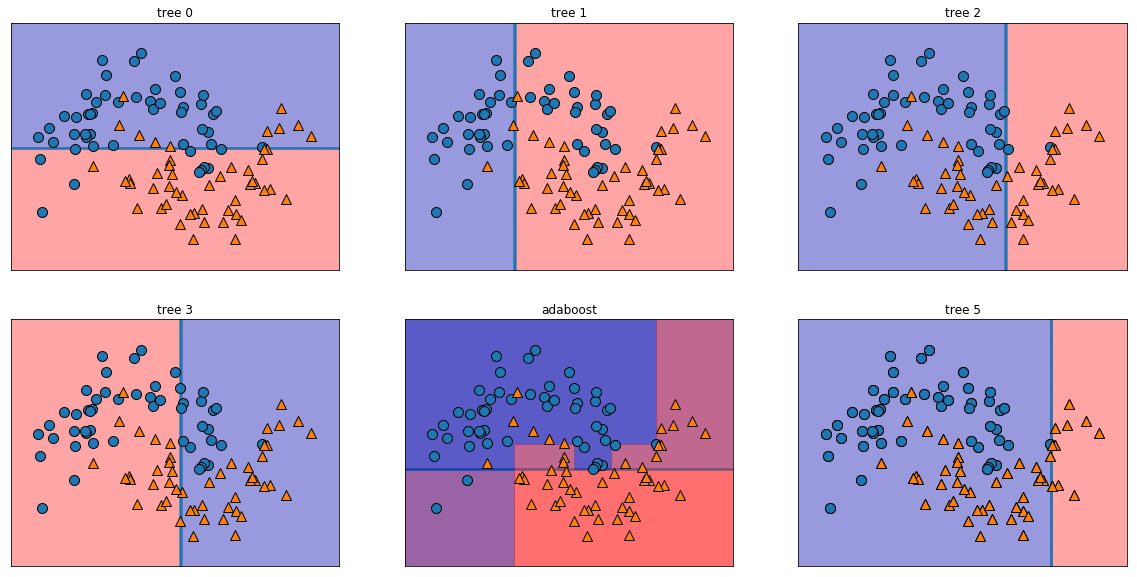

In [18]:
# Xm, ym train은 배깅 분류기 데이터임 moon 데이터 p.668
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 6, random_state = 42)
ada.fit(Xm_train, ym_train)

fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax = ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill = True, ax = axes[-1, 1], alpha = 0.4)
axes[-1, 1].set_title("adaboost")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 06. 비지도학습 기법
    
        01. Association Rules

연관규칙 p.700
    - 조건절 : (X -> Y) X를 사면, Y도 산다
    - 지지도(support) : 조건절이 일어날 확률 = (X, Y를 모두 포함하는 수) / (전체 수)
    - 신뢰도(confidence) : 조건절이 일어났을 때 결과절이 일어날 확률 = (X, Y를 모두 포함하는 수) / (X가 포함된 수)
    - 향상도(Lift) : 조건절과 결과절이 서로 독립일 때에 비해, 두 사건이 동시에 얼마나 발생하는가의 비율
            = (신뢰도) / (Y의 지지도 -> 단순히 Y가 일어날확률)
    - 지지도를 통해 = 규칙의 빈도가 많은가, 구성비가 높은가
    - 신뢰도를 통해 = 규칙의 조건부확률이 높은가
    - 향상도를 통해 = 규칙이 우연에 비해 서로 관계가 있는가
        1. 일정수준 이하 '지지도'와 '신뢰도'를 가진 규칙은 제외
        2. '향상도'가 높은 순(130% 이상)으로 유용한 규칙만 추출
    - Arules의 연산량을 줄이는 알고리즘 = Apriori algorithm (item set을 줄이는 방법)
    - 일정 support값(보통0.5)을 기준으로 그 이하 값을 가진 집합은 가지치기(pruning)

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 06. 비지도학습 기법
    
        02. CF(Collaborative Filtering)

CF
    - 아이템에 대한 (고객의) 선호도를 계산 = (고객 간) 유사성
    - 유사성의 계산은 상품 구입 빈도, 유저의 상품 평가, 상품 클릭 횟수 등
    - User based vs item based (item based는 Arules와 어느정도 비슷해서 이를 Arules를 사용하는게 나음)
    - 데이터가 많다(User based CF) / 데이터가 적다 (Arules or Item based CF)

# 중요!!!!!!!!!!!!!!!!!!!!!!
- Module3

    -Part 06. 비지도학습 기법
    
        03. clustering

clustering method
    - partitioning
    - hierarchical
    - density-based
    - Grid-based

partitioning (k-means) - p.713
    - 대표적으로 K-means, K-medoid
    - k개 그룹으로 나눔
        - k가 hyperparameter
    - K-means에 대한 설명은 수업 정리 파일 참조
    - k개의 점을 찍은 후 각각의 데이터 포인트들이 그 중심과 얼마나 가까운지를 cost로 정의
$ x_i : 각각의 데이터 포인트,\; b_j : j번째 클러스터의 중심$

$ w_{ij}\; :\; i번째\; 데이터가\; j번째 \;클러스터에\; 속하면\; 1,\; 아니면\; 0인\; binary\; variable$

    - inertia value : 군집화가 된 후에 각 중심점에서 군집의 데이터간 거리를 합산한 것 (k 지정 관련)
    ( 고유값 그래프 보듯 경사가 급 완만해지는 부분에서 적절하다고 볼 수 있음 )
    - 단점 : local opima에 수렴하므로 최초 initial 중심 값에 매우 민감함

In [21]:
# 데이터 생성------------------------------------- p.717
np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype = np.uint8)
X = np.zeros((N,2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ['cornflowerblue', 'black', 'white']
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 누적 확률
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k] + Mu[T3[n, :] == 1, k])